In [16]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6fb08db16e9040f6a6d1b54cd51db97e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vjVhTyKVkilmTMElEfNelXAaM1lp3uvAp5pqdYXllY7f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6fb08db16e9040f6a6d1b54cd51db97e.get_object(Bucket='churnmodelling-donotdelete-pr-rogpw8vioih1eq',Key='Churn_Modelling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data1 = pd.read_csv(body)
data1.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
import numpy as np
import pandas as pd
data1.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [18]:
data1['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
data1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

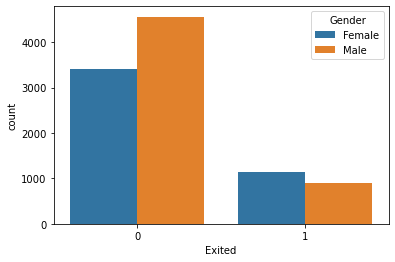

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x  = 'Exited', hue = 'Gender', data = data1)

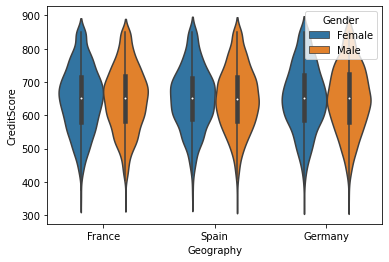

In [21]:
sns.violinplot(x = 'Geography',y = 'CreditScore',hue = 'Gender',data = data1)

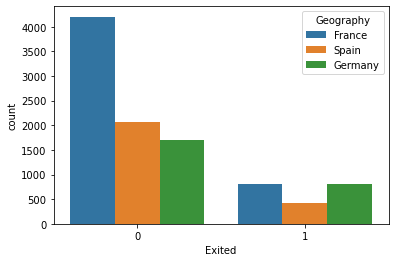

In [22]:
sns.countplot(x  = 'Exited', hue = 'Geography', data = data1)

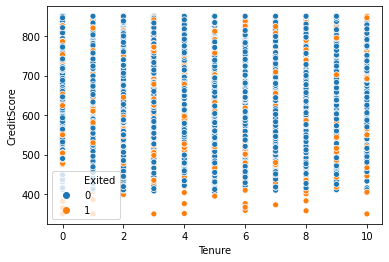

In [23]:
sns.scatterplot(x ='Tenure',y = 'CreditScore',hue = 'Exited',data = data1,markers = ['x'])

In [24]:
data1['Gender'] = data1['Gender'].map({'Female':1 , 'Male':0})
data1['Geography'] = data1['Geography'].map({'France':1,'Germany':2,'Spain':3})
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,1,43,2,125510.82,1,1,1,79084.10,0


In [25]:
x = data1[['CreditScore','Geography','Gender','Tenure','IsActiveMember','Balance']]
y = data1['Exited']
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.32622142, -0.90188624,  1.09598752, -1.04175968,  0.97024255,
        -1.22584767],
       [-0.44003595,  1.51506738,  1.09598752, -1.38753759,  0.97024255,
         0.11735002],
       [-1.53679418, -0.90188624,  1.09598752,  1.03290776, -1.03067011,
         1.33305335],
       [ 0.50152063, -0.90188624,  1.09598752, -1.38753759, -1.03067011,
        -1.22584767],
       [ 2.06388377,  1.51506738,  1.09598752, -1.04175968,  0.97024255,
         0.7857279 ]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7000, 6) (7000,)
Test set: (3000, 6) (3000,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[   2  618]
 [   0 2380]]


Confusion matrix, without normalization
[[   2  618]
 [   0 2380]]


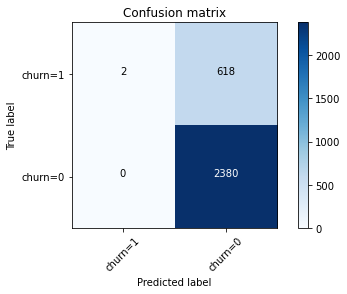

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


In [40]:
from ibm_watson_machine_learning import APIClient

In [41]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"v5CHgz3zy916l4pqJygEvgJj0EJ-sRlwlbNLrmPTAK-V"
}

In [42]:
client = APIClient(wml_credentials)

In [43]:
metadata = {
    client.spaces.ConfigurationMetaNames.NAME:"Churn analysis deployment1",
    client.spaces.ConfigurationMetaNames.DESCRIPTION:"To predict churn modelling",
    client.spaces.ConfigurationMetaNames.STORAGE:{
        "type":"bmcos_object_storage",
        "resource_crn":"crn:v1:bluemix:public:cloud-object-storage:global:a/d0d0bc1a43274a6c87aae99b6fb6f606:6fb08db1-6e90-40f6-a6d1-b54cd51db97e::"
    },
    client.spaces.ConfigurationMetaNames.COMPUTE:{
        "name":"Machine Learning-31",
        "crn":"crn:v1:bluemix:public:pm-20:us-south:a/d0d0bc1a43274a6c87aae99b6fb6f606:6172ec29-63be-44c9-8b40-b1a61de74593::Ma"
    }
    
}

In [44]:
space_details = client.spaces.store(meta_props=metadata)

Space has been created. However some background setup activities might still be on-going. Check for 'status' field in the response. It has to show 'active' before space can be used. If its not 'active', you can monitor the state with a call to spaces.get_details(space_id)


In [45]:
space_id = space_details['metadata']['id']

In [46]:
client.set.default_space(space_id)

'SUCCESS'

In [51]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [52]:
import sklearn
sklearn.__version__

'0.23.1'

In [53]:
import sklearn
sklearn.__version__import sklearn
sklearn.__version__

In [54]:
model_details = client.repository.store_model(model=LR,meta_props={
    client.repository.ModelMetaNames.NAME:"Churn_Prediction_analysis",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:sepc_id,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.22"
})

In [55]:
model_id = model_details['metadata']['id']

In [56]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME:"Churn_Deployment",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [57]:
deployment_details = client.deployments.create(artifact_uid=model_id,meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: 'c9326341-cca5-4b00-9865-de1a329b8198' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='293e376c-7d35-4bfd-ac31-2536e1a40e5c'
------------------------------------------------------------------------------------------------




In [60]:
client.deployments.list()

------------------------------------  ----------------  -----  ------------------------
GUID                                  NAME              STATE  CREATED
293e376c-7d35-4bfd-ac31-2536e1a40e5c  Churn_Deployment  ready  2020-10-20T08:23:28.858Z
------------------------------------  ----------------  -----  ------------------------


In [61]:
deployment_details

{'entity': {'asset': {'id': 'c9326341-cca5-4b00-9865-de1a329b8198'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'Not_Applicable', 'name': 'S', 'num_nodes': 1},
  'name': 'Churn_Deployment',
  'online': {},
  'space_id': '5a61a0e9-5521-4fac-ba96-3a546803afb7',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/293e376c-7d35-4bfd-ac31-2536e1a40e5c/predictions'},
   'state': 'ready'}},
 'metadata': {'created_at': '2020-10-20T08:23:28.858Z',
  'id': '293e376c-7d35-4bfd-ac31-2536e1a40e5c',
  'modified_at': '2020-10-20T08:23:28.858Z',
  'name': 'Churn_Deployment',
  'owner': 'IBMid-550008Y7RR',
  'space_id': '5a61a0e9-5521-4fac-ba96-3a546803afb7'}}

In [58]:
deployment_id = deployment_details['metadata']['id']

In [59]:
payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA:[{
      "fields ":[['CreditScore','Geography','Gender','Tenure','IsActiveMember','Balance']],
        "values":[[600,2,1,3,1,100000]],
    }]
}

In [43]:
client.deployments.score(deployment_id=deployment_id,meta_props=payload)

{'predictions': [{'fields': ['prediction', 'probability'],
   'values': [[1, [0.0, 1.0]]]}]}